# Facebook Prophet Time Series 
###### Working notebook for now, sorry if it's hard to follow.  Tried to add in a few comments.

In [1]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt


In [2]:
target = pd.read_csv('DengAI_Predicting_Disease_Spread_-_Training_Data_Labels.csv')
train = pd.read_csv('DengAI_Predicting_Disease_Spread_-_Training_Data_Features.csv')

In [3]:
target.tail()

city  year  weekofyear  total_cases
1451   iq  2010          21            5
1452   iq  2010          22            8
1453   iq  2010          23            1
1454   iq  2010          24            1
1455   iq  2010          25            4

In [4]:
train.head()

city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
0   sj  1990          18      1990-04-30  0.122600  0.103725  0.198483   
1   sj  1990          19      1990-05-07  0.169900  0.142175  0.162357   
2   sj  1990          20      1990-05-14  0.032250  0.172967  0.157200   
3   sj  1990          21      1990-05-21  0.128633  0.245067  0.227557   
4   sj  1990          22      1990-05-28  0.196200  0.262200  0.251200   

    ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  ...  \
0  0.177617                 12.42             297.572857  ...   
1  0.155486                 22.82             298.211429  ...   
2  0.170843                 34.54             298.781429  ...   
3  0.235886                 15.36             298.987143  ...   
4  0.247340                  7.52             299.518571  ...   

   reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
0                            32.00                             73.365714   
1                            17.94                             77.368571   
2                            26.10                             82.052857   
3                            13.90                             80.337143   
4                            12.20                             80.460000   

   reanalysis_sat_precip_amt_mm  reanalysis_specific_humidity_g_per_kg  \
0                         12.42                              14.012857   
1                         22.82                              15.372857   
2                         34.54                              16.848571   
3                         15.36                              16.672857   
4                          7.52                              17.210000   

   reanalysis_tdtr_k  station_avg_temp_c  station_diur_temp_rng_c  \
0           2.628571           25.442857                 6.900000   
1           2.371429           26.714286                 6.371429   
2           2.300000           26.714286                 6.485714   
3           2.428571           27.471429                 6.771429   
4           3.014286           28.942857                 9.371429   

   station_max_temp_c  station_min_temp_c  station_precip_mm  
0                29.4                20.0               16.0  
1                31.7                22.2                8.6  
2                32.2                22.8               41.4  
3                33.3                23.3                4.0  
4                35.0                23.9                5.8  

[5 rows x 24 columns]

In [5]:
#merge train features and target total_cases into 1 df for ease 
total_train = pd.merge(target,train,how='left',left_on=['city','year','weekofyear'], right_on=['city','year','weekofyear'])
total_train['week_start_date'] = pd.to_datetime(total_train['week_start_date'])
total_train['y'] = total_train['total_cases']
total_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1455
Data columns (total 26 columns):
city                                     1456 non-null object
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
total_cases                              1456 non-null int64
week_start_date                          1456 non-null datetime64[ns]
ndvi_ne                                  1262 non-null float64
ndvi_nw                                  1404 non-null float64
ndvi_se                                  1434 non-null float64
ndvi_sw                                  1434 non-null float64
precipitation_amt_mm                     1443 non-null float64
reanalysis_air_temp_k                    1446 non-null float64
reanalysis_avg_temp_k                    1446 non-null float64
reanalysis_dew_point_temp_k              1446 non-null float64
reanalysis_max_air_temp_k                1446 non-null float64
reanalysis_

In [6]:
sj = pd.DataFrame(total_train.loc[total_train.city == 'sj'])
iq = pd.DataFrame(total_train.loc[total_train.city == 'iq'])
# fill the null values
# fills with last observation (takes last weeks data) 'ffil' -> forward fill
sj.fillna(method='ffill',inplace=True)
iq.fillna(method='ffill',inplace=True)
print(sj.info())
print(iq.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 0 to 935
Data columns (total 26 columns):
city                                     936 non-null object
year                                     936 non-null int64
weekofyear                               936 non-null int64
total_cases                              936 non-null int64
week_start_date                          936 non-null datetime64[ns]
ndvi_ne                                  936 non-null float64
ndvi_nw                                  936 non-null float64
ndvi_se                                  936 non-null float64
ndvi_sw                                  936 non-null float64
precipitation_amt_mm                     936 non-null float64
reanalysis_air_temp_k                    936 non-null float64
reanalysis_avg_temp_k                    936 non-null float64
reanalysis_dew_point_temp_k              936 non-null float64
reanalysis_max_air_temp_k                936 non-null float64
reanalysis_min_air_temp_k  

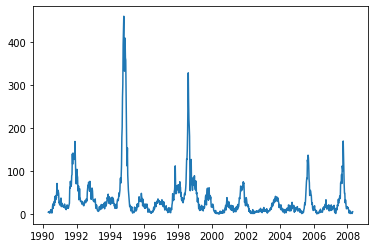

In [7]:
#show time series for both cities 
plt.plot(sj.week_start_date, sj.total_cases)

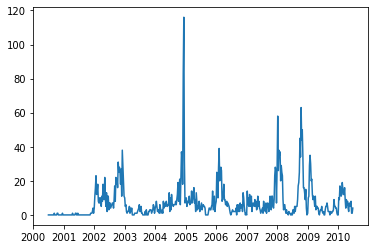

In [8]:
plt.plot(iq.week_start_date, iq.total_cases)

In [9]:
# #plotting rolling averages
# #used previously for hourly data, not working right for weekly data
# # will work on later 

# test = iq.loc[:,['week_start_date','total_cases']]
# test1 = test.set_index(pd.DatetimeIndex(test['week_start_date']))
# test1.drop(columns=['week_start_date'],inplace=True)
# season = test1.rolling(window=30*24, center=True, min_periods=4).mean().groupby(test1.index.weekofyear).mean()
# q25 = test1.rolling(window=30*24, center=True, min_periods=4).mean().groupby(test1.index.weekofyear).quantile(.25)
# q75 = test1.rolling(window=30*24, center=True, min_periods=4).mean().groupby(test1.index.weekofyear).quantile(.75)

# f, ax = plt.subplots(figsize=(8,6))

# ax.fill_between(season.index,q25.values.ravel(),q75.values.ravel(),color='#00BFFF',hatch='\\\\\\', alpha=0.45, label='Inter Quartile Range')
# season.plot(ax=ax, color='#4B0082')
# #month_list = pd.date_range('06/01/2015','09/22/2019 23:00:00',freq='24H')
# ax.set_xlabel('Day Of Year')
# ax.set_ylabel('Total Cases')
# ax.set_title('30 Day Rolling Average')

# month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    
# ax.set_xlabel('')
# #ax.xaxis.set_major_locator(months)
# ax.set_xticklabels(month_names)
# ax.grid(ls=':')

# plt.legend()

In [10]:
# test = sj.loc[:,['week_start_date','total_cases']]
# test1 = test.set_index(pd.DatetimeIndex(test['week_start_date']))
# test1.drop(columns=['week_start_date'],inplace=True)
# season = test1.rolling(window=7*24, center=True).mean().groupby(test1.index.weekofyear).mean()
# q25 = test1.rolling(window=7*24, center=True).mean().groupby(test1.index.weekofyear).quantile(.25)
# q75 = test1.rolling(window=7*24, center=True).mean().groupby(test1.index.weekofyear).quantile(.75)

# f, ax = plt.subplots(figsize=(8,6))

# ax.fill_between(season.index,q25.values.ravel(),q75.values.ravel(),color='#00BFFF',hatch='\\\\\\', alpha=0.45, label='Inter Quartile Range')
# season.plot(ax=ax, color='#4B0082')
# #month_list = pd.date_range('06/01/2015','09/22/2019 23:00:00',freq='24H')
# ax.set_xlabel('Day Of Year')
# ax.set_ylabel('Total Cases')
# ax.set_title('7 Day Rolling Average Energy Demand')

# month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    
# ax.set_xlabel('')
# #ax.xaxis.set_major_locator(months)
# ax.set_xticklabels(month_names)
# ax.grid(ls=':')

# plt.legend()

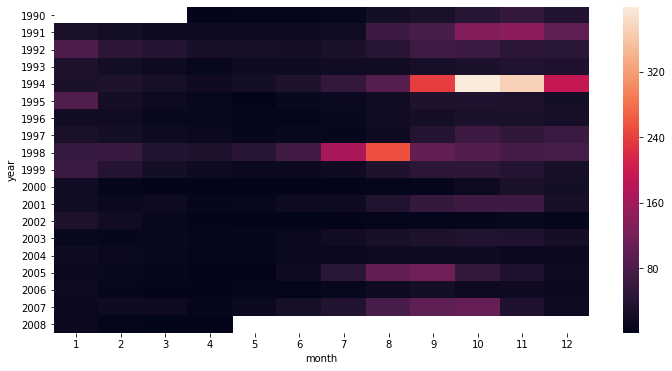

In [11]:
# heat map rather than bar graph for total num cases per month per year
# 

import seaborn as sns

test = sj.loc[:,['week_start_date','y']]
test1 = test.set_index(pd.DatetimeIndex(test['week_start_date']))
test1.drop(columns=['week_start_date'],inplace=True)
test1['month'] = test1.index.month
test1['year'] = test1.index.year
heat = test1.groupby(['year','month']).mean().unstack()
heat.columns = heat.columns.droplevel(0)
f,ax = plt.subplots(figsize=(12,6))
sns.heatmap(heat, ax=ax)

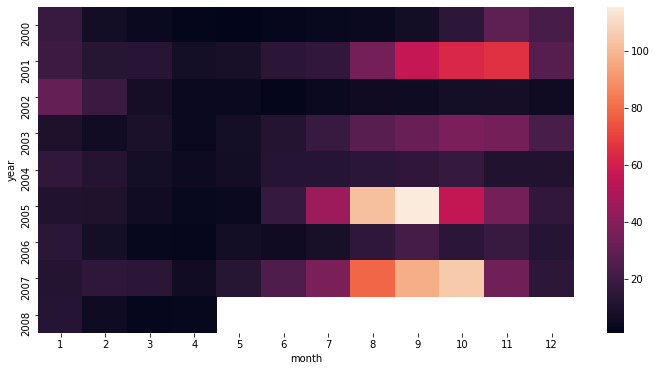

In [12]:
#same heatmap with big years removed so the yearly and bi-yearly trend is a bit more obvious

test = sj.loc[sj.week_start_date.dt.year > 1999,['week_start_date','y']]
test1 = test.set_index(pd.DatetimeIndex(test['week_start_date']))
test1.drop(columns=['week_start_date'],inplace=True)
test1['month'] = test1.index.month
test1['year'] = test1.index.year
heat = test1.groupby(['year','month']).mean().unstack()
heat.columns = heat.columns.droplevel(0)
f,ax = plt.subplots(figsize=(12,6))
sns.heatmap(heat, ax=ax)

In [13]:
#helps dertime time frame for when the time series trend repeats, more helpful in ARIMA than FBProphet
#haven't messed with getting it to work yet 

from pandas.plotting import autocorrelation_plot, scatter_matrix

# autocorrelation_plot(sj.loc[:,['week_start_date','y']])

In [14]:
# scatter matrix (used for generating correlation heatmap)
# sometimes visusal is easier to understand than correlation coef for me
# not sure how to get the x labels to rotate, same order so can count how many squares in then cound down to see what
# the x label would be for the square you're interested in

# f, axx = plt.subplots(figsize=(15,15))
# axs = scatter_matrix(sj, ax=axx)

# n = len(sj.columns)
# print(n)
# for x in range(n-3):
#     for y in range(n-3):
#         # to get the axis of subplots
#         axy = axs[x][y]
#         axxx = axs[y][x]
#         # to make x axis name vertical  
#         axxx.xaxis.label.set_rotation(45)
#         # to make y axis name horizontal 
#         axy.yaxis.label.set_rotation(0)
#         # to make sure y axis names are outside the plot area
#         axy.yaxis.labelpad = 50

In [15]:
# f, ax = plt.subplots(figsize=(15,10))
# corr = sj.corr()
# sns.heatmap(corr, 
#             xticklabels=corr.columns.values,
#             yticklabels=corr.columns.values,
#            ax=ax,
#            annot=True,
#            cmap="coolwarm")

In [16]:
# plots from scatter matrix just showing features correlation with number of cases 
#FBProphet adds in features as "extra_regressors"
#seems as though features with linear correlation with predicted variable are best to use
# for col in sj.columns:
#     if sj[col].dtype in ['float64','int64']:
#         plt.scatter(sj[col],sj['y'])
#         plt.title('{}'.format(col))
#         plt.xlabel('{}'.format(col))
#         plt.ylabel('num_cases')
#         plt.show()

In [17]:
#plotting each feature's time series to see if anything unusual happens in features around big peaks in number of cases
# sj_plot = pd.DataFrame(sj.loc[sj.week_start_date.dt.year > 1999,:])
# for col in sj.columns:
#     if sj[col].dtype in ['float64','int64']:
#         f, ax1 = plt.subplots(figsize=(8,5))
#         ax1.plot(sj_plot['week_start_date'],sj_plot[col],label='{}'.format(col),c='r')
#         ax1.set_xlabel('time')
#         ax1.set_ylabel('{}'.format(col))
#         ax2 = ax1.twinx()
#         ax2.plot(sj_plot['week_start_date'],sj_plot['y'],label='total cases',c='b')
#         ax2.set_ylabel('total_cases')
#         plt.legend()
#         plt.xlim(pd.to_datetime('2000-01-01'), pd.to_datetime('2008-05-01'))
#         plt.show()

In [18]:
# plt.plot(sj['week_start_date'],sj['y'])
# plt.xlim(pd.to_datetime('1998-01-01'), pd.to_datetime('1999-03-01'))
# plt.show()
# plt.plot(sj['week_start_date'],sj['y'])
# plt.xlim(pd.to_datetime('1994-01-01'), pd.to_datetime('1995-03-01'))
# plt.show()

# Starting Predictions with baseline model

In [16]:
#scaling predictions to reduce the overall trend can help a time series model better understand the trend within each 
#year, month, week, day, ...

#fbprophet has built in normalization of extra regressors (features/columns) so no need to scale them before fitting
#prophet expects dataframe with at least "ds" and "y" columns 

import numpy as np
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

sj_train = pd.DataFrame(sj.loc[:,['week_start_date','y']])
sj_train.rename(columns={'week_start_date':'ds'}, inplace=True)

sj_train.head()
# names are weird, sorry train_train is validation split of our training data 
#splitting off last year of data in sj to use to test to see how well model will predict into future 
sj_train_train = pd.DataFrame(sj_train.loc[sj_train.ds < pd.to_datetime('2007-04-01'),:])
scale.fit(sj_train_train.y.values.reshape(-1,1))
sj_train_test = pd.DataFrame(sj_train.loc[sj_train.ds >= pd.to_datetime('2007-04-01'),:])
sj_train_train.y = scale.transform(sj_train_train.y.values.reshape(-1,1))
sj_train_test.y = scale.transform(sj_train_test.y.values.reshape(-1,1))
sj_train_train.tail()

ds         y
875 2007-02-26 -0.311063
876 2007-03-05 -0.349472
877 2007-03-12 -0.426288
878 2007-03-19 -0.272655
879 2007-03-26 -0.503105

In [20]:
model = Prophet()
model.fit(sj_train_train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [21]:
#makes a dataframe for the model to use to predict into future
#takes your time period and adds on how long you specify
#52 weeks added here for one year (the one year we cut off)
future = model.make_future_dataframe(periods=52,freq='1W')

In [22]:
forcast = model.predict(future)

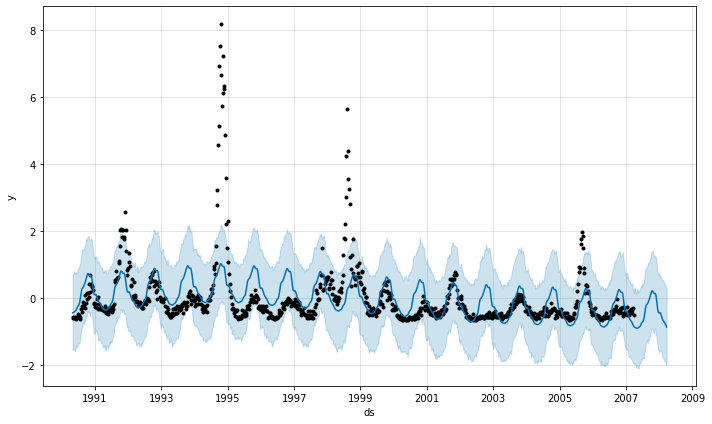

In [23]:
model.plot(forcast)
plt.show()

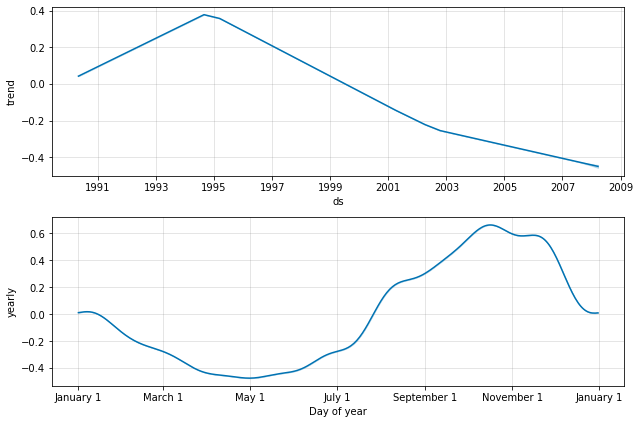

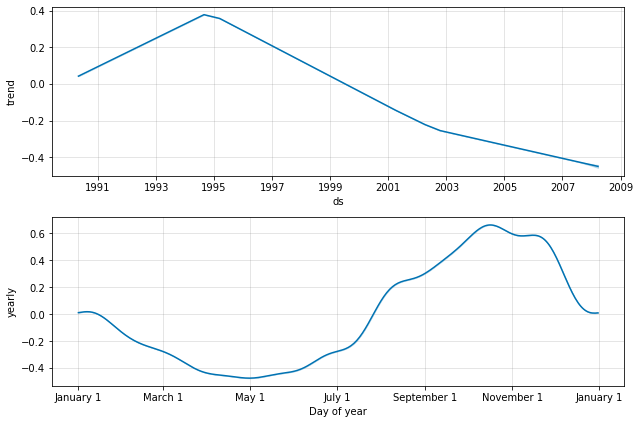

In [24]:
#show the trends that the model is pulling out of the data 
model.plot_components(forcast)

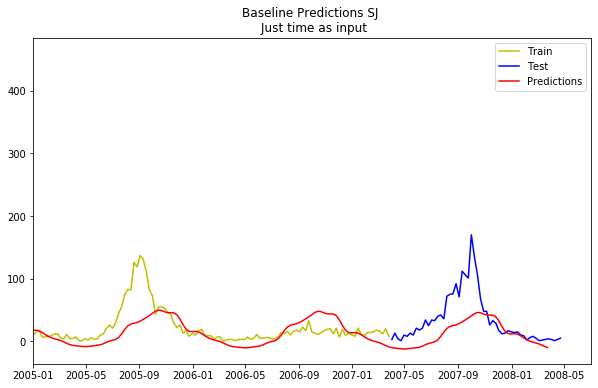

In [25]:
f#plot predictions vs true and testing set
plt.figure(figsize=(10,6))
plt.plot(sj_train_train['ds'], 
            scale.inverse_transform(sj_train_train['y'].values.reshape(-1,1)), c='y',label="Train")
plt.plot(sj_train_test['ds'],
            scale.inverse_transform(sj_train_test['y'].values.reshape(-1,1)),c='b',label="Test")
plt.plot(forcast['ds'],
            scale.inverse_transform(forcast['yhat'].values.reshape(-1,1)),c='r',label="Predictions")
plt.xlim(pd.to_datetime('2005-01-01'), pd.to_datetime('2008-07-01'))
plt.legend()
plt.title('Baseline Predictions SJ \n Just time as input')
plt.show()

In [26]:
#next 3 are built in metrics 
# hard to explain in just comments 
# can read about under "diagnostics" on fbprophet if interested 
# overall better than just cuttinf off last year, last year just easy to absorb
# from fbprophet.diagnostics import cross_validation
# df_cv = cross_validation(model, initial='500 days', period='180 days', horizon = '365 days')
# df_cv.head()

In [27]:
# from fbprophet.diagnostics import performance_metrics
# df_p = performance_metrics(df_cv)
# df_p.head()

In [28]:
# from fbprophet.plot import plot_cross_validation_metric
# fig = plot_cross_validation_metric(df_cv, metric='mae')

# Tuning model and adding in some features

In [29]:
sj.columns

Index(['city', 'year', 'weekofyear', 'total_cases', 'week_start_date',
       'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm',
       'reanalysis_air_temp_k', 'reanalysis_avg_temp_k',
       'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k',
       'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'y'],
      dtype='object')

In [79]:
from sklearn.preprocessing import MinMaxScaler
# Can change between minmax and standard with following line, for testing 
scale = StandardScaler()
#add some more columns in to training data, tried not to overlap in category too much
sj_train = pd.DataFrame(sj.loc[sj.week_start_date.dt.year > 1999,['week_start_date','y','station_precip_mm','ndvi_ne',
                                 'ndvi_sw','reanalysis_relative_humidity_percent','station_diur_temp_rng_c',
                                              'reanalysis_avg_temp_k','station_min_temp_c','station_max_temp_c','reanalysis_dew_point_temp_k',
                                                                 'reanalysis_precip_amt_kg_per_m2']])
sj_train.rename(columns={'week_start_date':'ds'}, inplace=True)
# sj_train['cap'] = np.max(sj_train['y'])

sj_train.head()
sj_train_train = pd.DataFrame(sj_train.loc[sj_train.ds < pd.to_datetime('2007-04-01'),:])
scale.fit(sj_train_train.y.values.reshape(-1,1))
sj_train_test = pd.DataFrame(sj_train.loc[sj_train.ds >= pd.to_datetime('2007-04-01'),:])
sj_train_train.y = scale.transform(sj_train_train.y.values.reshape(-1,1))
sj_train_test.y = scale.transform(sj_train_test.y.values.reshape(-1,1))
#commented out cap lines are for growth='logistic'
# sj_train_test.cap = scale.transform(sj_train_test.cap.values.reshape(-1,1))
# sj_train_train.cap = scale.transform(sj_train_train.cap.values.reshape(-1,1))
sj_train_train.tail()



ds         y  station_precip_mm  ndvi_ne   ndvi_sw  \
875 2007-02-26  0.038289               22.9  0.21210  0.054383   
876 2007-03-05 -0.061607                8.4  0.05430  0.120857   
877 2007-03-12 -0.261398                0.3  0.03730  0.175486   
878 2007-03-19  0.138184                0.5  0.01170  0.149200   
879 2007-03-26 -0.461189                7.6  0.02285  0.082957   

     reanalysis_relative_humidity_percent  station_diur_temp_rng_c  \
875                             78.125714                 7.000000   
876                             75.014286                 7.671429   
877                             74.025714                 8.042857   
878                             75.438571                 7.542857   
879                             76.784286                 7.800000   

     reanalysis_avg_temp_k  station_min_temp_c  station_max_temp_c  \
875             298.514286                21.1                31.7   
876             299.250000                22.2                32.2   
877             299.335714                21.7                31.7   
878             298.657143                22.2                32.8   
879             298.850000                22.8                33.3   

     reanalysis_dew_point_temp_k  reanalysis_precip_amt_kg_per_m2  
875                   294.204286                            23.12  
876                   294.328571                             3.70  
877                   294.020000                             1.50  
878                   293.770000                             5.10  
879                   294.375714                            25.20

In [80]:
#add in regressors and tune parameters.  Fourier and prior scale have to do with how flexible the model is to changes
#higher number is model responds more strongly to that input, changepoint is on a smaller scale than seasonality and regressors
model = Prophet(changepoint_range=.75, growth='linear',yearly_seasonality=False, changepoint_prior_scale=.8)
model.add_seasonality(period=365*2,name='bi-anual',fourier_order=10, prior_scale=20)
model.add_regressor('station_precip_mm', mode='additive',prior_scale=8)
model.add_regressor('ndvi_ne',standardize=True, mode='additive',prior_scale=2)
# model.add_regressor('ndvi_nw',standardize=True, mode='additive',prior_scale=10)
model.add_regressor('ndvi_sw',standardize=True, mode='additive',prior_scale=2)
# model.add_regressor('ndvi_se',standardize=True, mode='additive')
model.add_regressor('reanalysis_relative_humidity_percent',standardize=True, mode='additive',prior_scale=8)
model.add_regressor('station_diur_temp_rng_c',standardize=True, mode='additive',prior_scale=10)
model.add_regressor('reanalysis_avg_temp_k',standardize=True, mode='additive',prior_scale=8)
model.add_regressor('station_min_temp_c',standardize=True, mode='additive',prior_scale=8)
model.add_regressor('station_max_temp_c',standardize=True, mode='additive',prior_scale=8)
model.add_regressor('reanalysis_dew_point_temp_k',standardize=True, mode='additive',prior_scale=8)
model.add_regressor('reanalysis_precip_amt_kg_per_m2',standardize=True, mode='additive',prior_scale=10)



model.fit(sj_train_train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [81]:
future = model.make_future_dataframe(periods=52*1,freq='1W')
#furture dataframe needs the extra regressor columns, so in real world need to be able to also predict all of the 
#feature variables
#merge with existing one to get last year of data 
#fbprophet uses built in scaling again
sj_merge = pd.DataFrame(sj_train.loc[:,['ds','station_precip_mm','cap','ndvi_ne',
                                 'ndvi_sw','reanalysis_relative_humidity_percent','station_diur_temp_rng_c',
                                              'reanalysis_avg_temp_k','station_min_temp_c','station_max_temp_c','reanalysis_dew_point_temp_k',
                                       'reanalysis_precip_amt_kg_per_m2']])

future_n = pd.merge(sj_merge.set_index(pd.DatetimeIndex(sj_merge['ds'])), 
                    future.set_index(pd.DatetimeIndex(future['ds'])), 
                    how='left', left_index=True, right_index=True)
future_n = future_n.reset_index()
future_n.drop(columns=['ds_x','ds_y'], inplace=True)
# future_n.cap = scale.transform(future_n.cap.values.reshape(-1,1))
future_n.head()

C:\Users\graha\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike



ds  station_precip_mm  cap  ndvi_ne   ndvi_sw  \
0 2000-01-01                7.9  NaN -0.13360  0.086311   
1 2000-01-08               28.6  NaN  0.20635  0.095833   
2 2000-01-15               12.0  NaN  0.33700  0.168629   
3 2000-01-22               17.7  NaN  0.35300  0.291429   
4 2000-01-29                2.0  NaN  0.34190  0.381420   

   reanalysis_relative_humidity_percent  station_diur_temp_rng_c  \
0                             76.317143                 6.557143   
1                             79.607143                 5.314286   
2                             77.342857                 5.157143   
3                             70.457143                 4.828571   
4                             67.765714                 6.842857   

   reanalysis_avg_temp_k  station_min_temp_c  station_max_temp_c  \
0             298.307143                21.1                29.4   
1             298.164286                21.7                29.4   
2             297.585714                21.7                28.3   
3             296.478571                20.0                27.2   
4             296.364286                17.8                28.3   

   reanalysis_dew_point_temp_k  reanalysis_precip_amt_kg_per_m2  
0                   293.887143                            12.34  
1                   294.355714                            32.30  
2                   293.191429                            47.10  
3                   290.852857                            14.70  
4                   289.827143                             0.70

In [82]:
forcast = model.predict(future_n)
forcast.tail()

ds     trend  cap  yhat_lower  yhat_upper  trend_lower  \
428 2008-03-25  0.540885  NaN   -2.749231    1.401833    -1.677977   
429 2008-04-01  0.543713  NaN   -2.731490    1.739784    -1.752583   
430 2008-04-08  0.546541  NaN   -2.773155    1.813824    -1.843096   
431 2008-04-15  0.549368  NaN   -2.855225    1.837241    -1.890979   
432 2008-04-22  0.552196  NaN   -2.980233    1.766889    -1.937323   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
428     2.506731       -1.114004             -1.114004             -1.114004   
429     2.575727       -0.924371             -0.924371             -0.924371   
430     2.645498       -0.901921             -0.901921             -0.901921   
431     2.704339       -0.984877             -0.984877             -0.984877   
432     2.781221       -1.050770             -1.050770             -1.050770   

     ...  station_min_temp_c  station_min_temp_c_lower  \
428  ...            0.080554                  0.080554   
429  ...            0.019872                  0.019872   
430  ...            0.047455                  0.047455   
431  ...            0.047455                  0.047455   
432  ...           -0.040811                 -0.040811   

     station_min_temp_c_upper  station_precip_mm  station_precip_mm_lower  \
428                  0.080554           0.001424                 0.001424   
429                  0.019872           0.001495                 0.001495   
430                  0.047455          -0.000146                -0.000146   
431                  0.047455           0.000914                 0.000914   
432                 -0.040811           0.001506                 0.001506   

     station_precip_mm_upper  multiplicative_terms  \
428                 0.001424                   0.0   
429                 0.001495                   0.0   
430                -0.000146                   0.0   
431                 0.000914                   0.0   
432                 0.001506                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper      yhat  
428                         0.0                         0.0 -0.573118  
429                         0.0                         0.0 -0.380658  
430                         0.0                         0.0 -0.355380  
431                         0.0                         0.0 -0.435509  
432                         0.0                         0.0 -0.498574  

[5 rows x 50 columns]

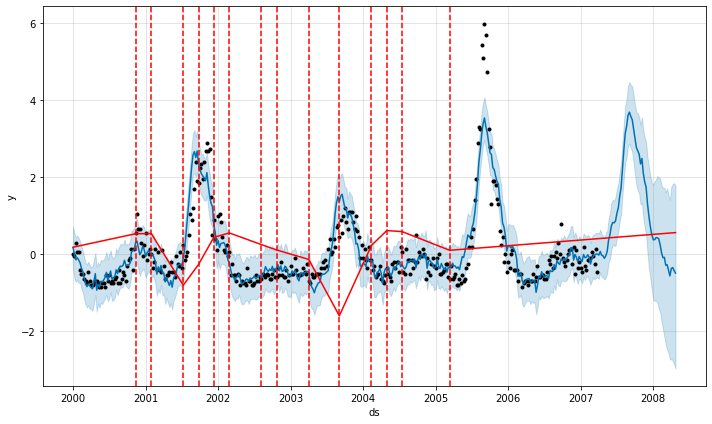

In [83]:
from fbprophet.plot import add_changepoints_to_plot
#add visualization for change point
#good for tweaking stuff, before changes there were 0 changepoints, had to increase prior_scale
fig = model.plot(forcast)
a = add_changepoints_to_plot(fig.gca(), model, forcast)

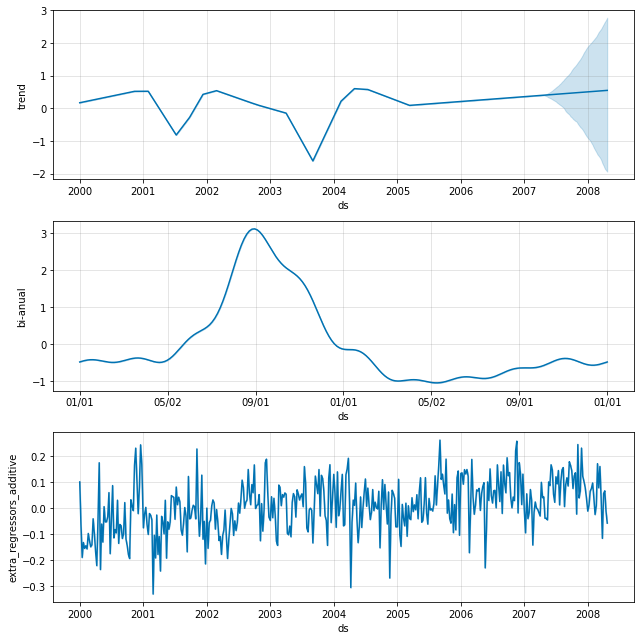

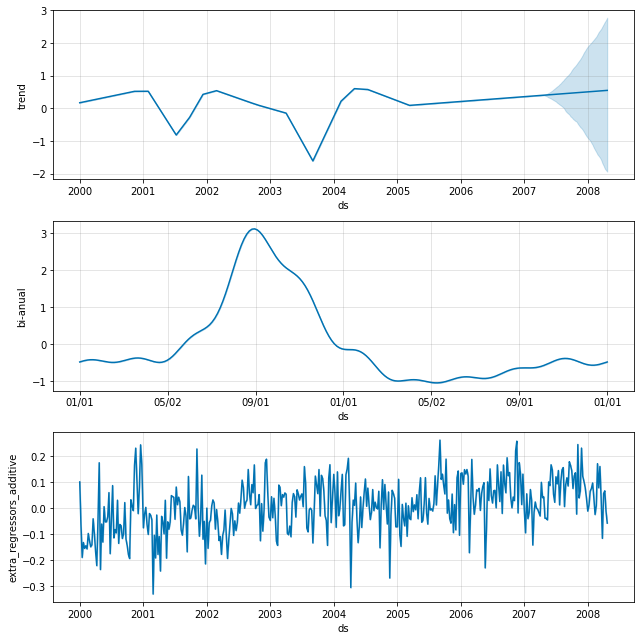

In [84]:
model.plot_components(forcast)
#bi-anual seasonality addition helps accuracy, but messes with yearly trend, need to fix it or just turn off yearly 

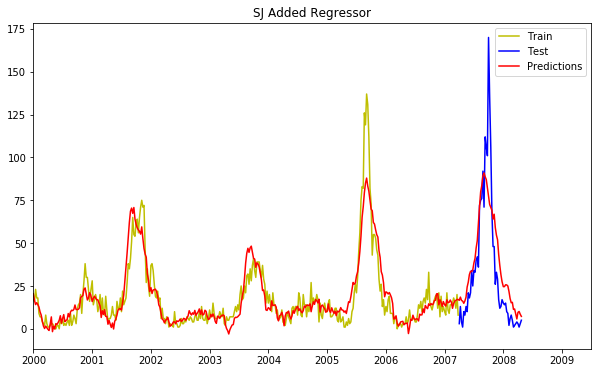

In [85]:
#vis results
plt.figure(figsize=(10,6))
plt.plot(sj_train_train['ds'], 
            scale.inverse_transform(sj_train_train['y'].values.reshape(-1,1)), c='y',label="Train")
plt.plot(sj_train_test['ds'],
            scale.inverse_transform(sj_train_test['y'].values.reshape(-1,1)),c='b',label="Test")
plt.plot(forcast['ds'],
            scale.inverse_transform(forcast['yhat'].values.reshape(-1,1)),c='r',label="Predictions")
# plt.plot(sj_train_train['ds'], 
#             sj_train_train['y']**3, c='y',label="Train")
# plt.plot(sj_train_test['ds'],
#             sj_train_test['y']**3,c='b',label="Test")
# plt.plot(forcast['ds'],
#             forcast['yhat']**3,c='r',label="Predictions")

plt.xlim(pd.to_datetime('2000-01-01'), pd.to_datetime('2009-07-01'))
plt.legend()
plt.title('SJ Added Regressor')
plt.show()

In [86]:
#write predictions to csv and json
def fill_0(value):
    if value < 0:
        return 0
    else:
        return int(value)
    

train = pd.DataFrame(sj_train_train.loc[:,['ds','y']])
test = pd.DataFrame(sj_train_test.loc[:,['ds','y']])
train.y = scale.inverse_transform(train.y)
test.y = scale.inverse_transform(test.y)
predictions = pd.DataFrame(forcast.loc[:,['ds','yhat']])
predictions.yhat = scale.inverse_transform(predictions.yhat)
predictions.yhat = predictions.yhat.apply(fill_0)
train.y = train.y.astype(int)
test.y = test.y.astype(int)
train.to_csv('sj_train.csv',date_format='%Y-%m-%d',index=False)
test.to_csv('sj_test.csv',date_format='%Y-%m-%d',index=False)
predictions.to_csv('sj_predictions.csv',date_format='%Y-%m-%d',index=False)


Train R2 0.8111975931658706
Test R2 0.7072923205380854
Train MAE 5.670625508622303
Test MAE 14.648843379737281


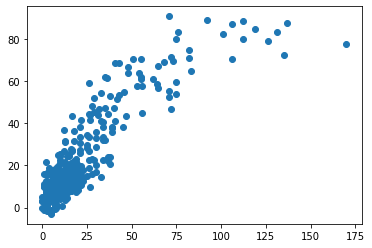

In [48]:
from sklearn.metrics import r2_score, mean_absolute_error
#train and test r2
#model still can't quite predict the huge jump in testng year of 2008

plt.scatter(sj_train['y'],scale.inverse_transform(forcast['yhat'].values.reshape(-1,1)))
print('Train R2',r2_score(scale.inverse_transform(sj_train_train['y'].values.reshape(-1,1)),scale.inverse_transform(forcast.loc[forcast.ds < pd.to_datetime('2007-04-01'), 'yhat'].values.reshape(-1,1)).reshape(len(sj_train_train),)))
print('Test R2',r2_score(scale.inverse_transform(sj_train_test['y'].values.reshape(-1,1)),scale.inverse_transform(forcast.loc[forcast.ds >= pd.to_datetime('2007-04-01'), 'yhat'].values.reshape(-1,1)).reshape(len(sj_train_test),)))
print('Train MAE',mean_absolute_error(scale.inverse_transform(sj_train_train['y'].values.reshape(-1,1)),scale.inverse_transform(forcast.loc[forcast.ds < pd.to_datetime('2007-04-01'), 'yhat'].values.reshape(-1,1)).reshape(len(sj_train_train),)))
print('Test MAE',mean_absolute_error(scale.inverse_transform(sj_train_test['y'].values.reshape(-1,1)),scale.inverse_transform(forcast.loc[forcast.ds >= pd.to_datetime('2007-04-01'), 'yhat'].values.reshape(-1,1)).reshape(len(sj_train_test),)))

In [39]:
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '730 days')
df_cv.head()

INFO:fbprophet:Making 7 forecasts with cutoffs between 2002-04-11 00:00:00 and 2005-03-26 00:00:00


ds      yhat  yhat_lower  yhat_upper         y     cutoff
0 2002-04-16 -0.735447   -1.033747   -0.428290 -0.561085 2002-04-11
1 2002-04-23 -0.740190   -1.048040   -0.457136 -0.810823 2002-04-11
2 2002-04-30 -0.616948   -0.922023   -0.345549 -0.710928 2002-04-11
3 2002-05-07 -0.624464   -0.920672   -0.329830 -0.760876 2002-04-11
4 2002-05-14 -0.350295   -0.670544   -0.043454 -0.760876 2002-04-11

In [40]:
df_p = performance_metrics(df_cv)
df_p.head()


horizon       mse      rmse       mae      mape  coverage
0 73 days  0.369653  0.607991  0.420087  2.259833  0.583333
1 75 days  0.368688  0.607197  0.419722  2.266540  0.597222
2 77 days  0.369115  0.607548  0.420771  2.282105  0.597222
3 78 days  0.367297  0.606050  0.419020  2.287999  0.604167
4 80 days  0.379429  0.615978  0.430825  2.425304  0.597222

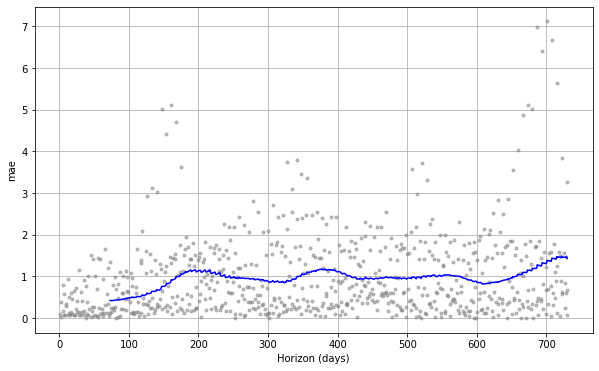

In [41]:

fig = plot_cross_validation_metric(df_cv, metric='mae')

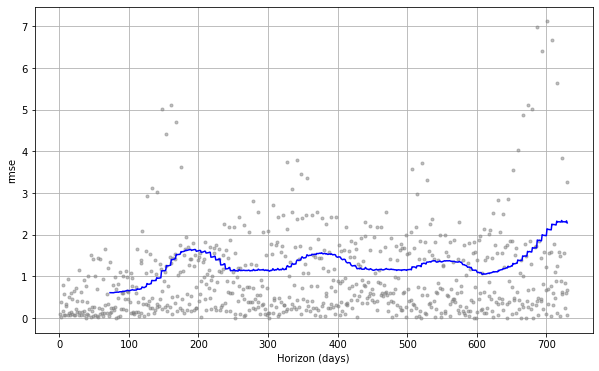

In [42]:
fig = plot_cross_validation_metric(df_cv, metric='rmse')

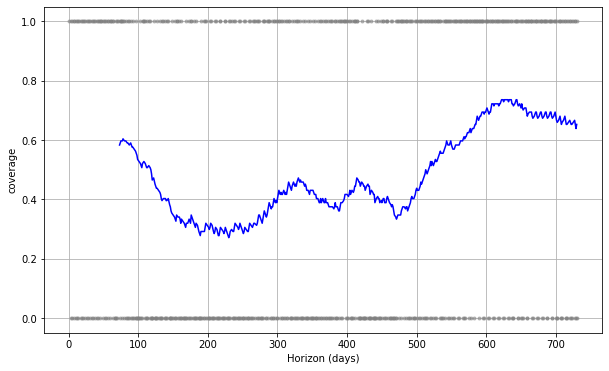

In [43]:
fig = plot_cross_validation_metric(df_cv, metric='coverage')

(-5, 50)

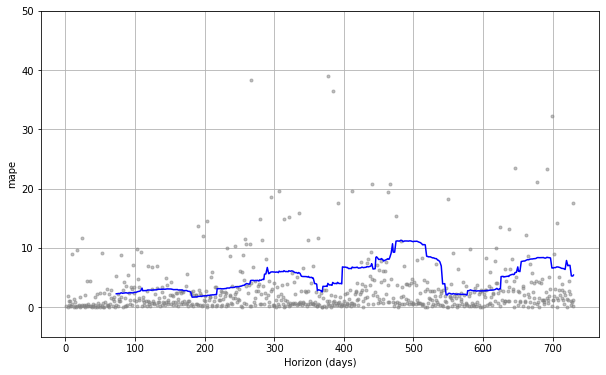

In [44]:
f, ax = plt.subplots(figsize=(10,6))
plot_cross_validation_metric(df_cv, metric='mape',ax=ax)
ax.set_ylim(-5,50)

# Now Starting with IQ data

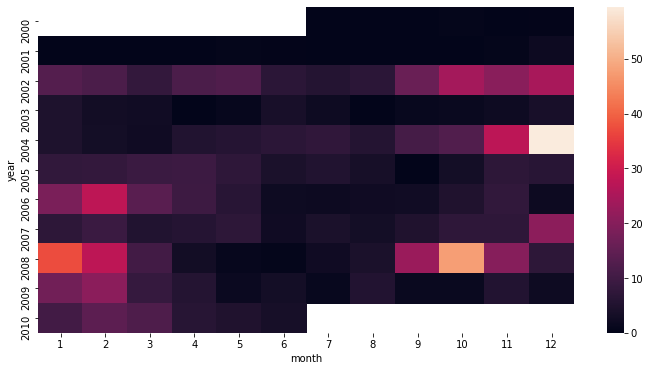

In [45]:
test = iq.loc[:,['week_start_date','y']]
test1 = test.set_index(pd.DatetimeIndex(test['week_start_date']))
test1.drop(columns=['week_start_date'],inplace=True)
test1['month'] = test1.index.month
test1['year'] = test1.index.year
heat = test1.groupby(['year','month']).mean().unstack()
heat.columns = heat.columns.droplevel(0)
f,ax = plt.subplots(figsize=(12,6))
sns.heatmap(heat, ax=ax)

C:\Users\graha\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3325: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



26


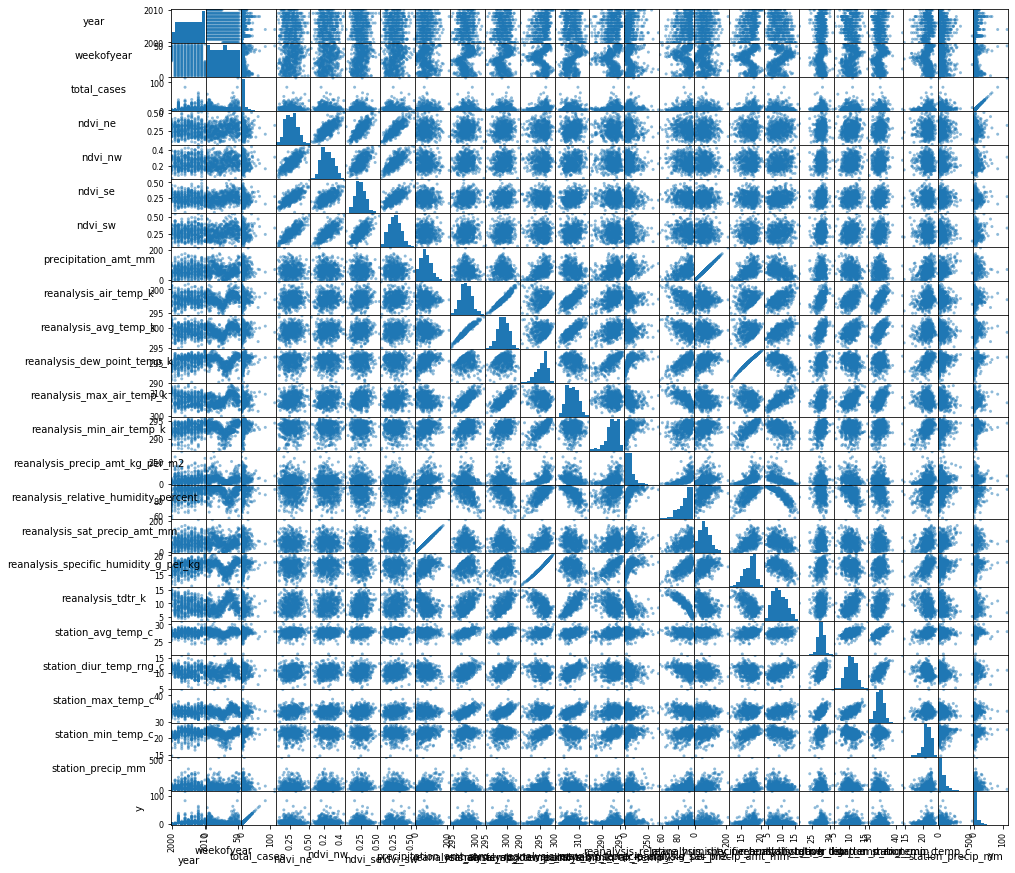

In [46]:
f, axx = plt.subplots(figsize=(15,15))
axs = scatter_matrix(iq, ax=axx)

n = len(iq.columns)
print(n)
for x in range(n-3):
    for y in range(n-3):
        # to get the axis of subplots
        axy = axs[x][y]
        axxx = axs[y][x]
        # to make x axis name vertical  
        axxx.xaxis.label.set_rotation(45)
        # to make y axis name horizontal 
        axy.yaxis.label.set_rotation(0)
        # to make sure y axis names are outside the plot area
        axy.yaxis.labelpad = 50

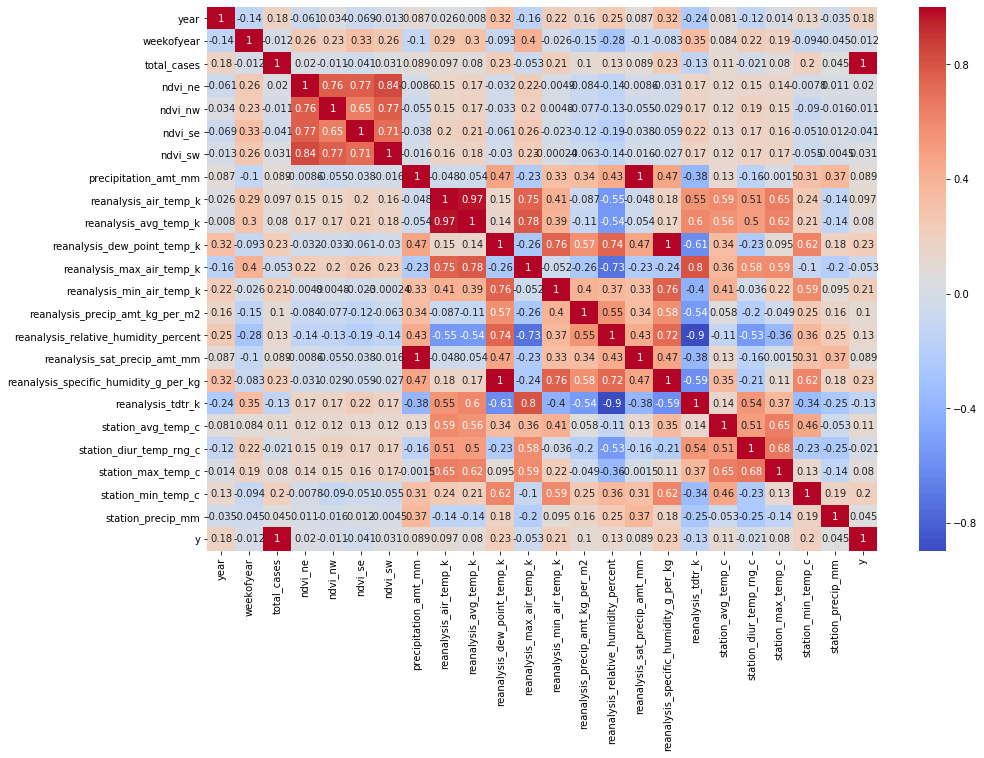

In [47]:
f, ax = plt.subplots(figsize=(15,10))
corr = iq.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           ax=ax,
           annot=True,
           cmap="coolwarm")

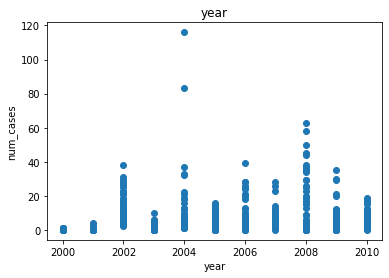

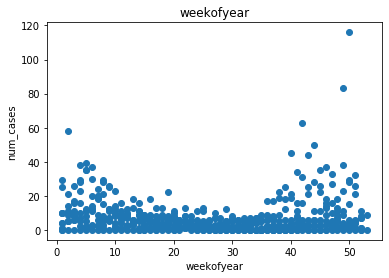

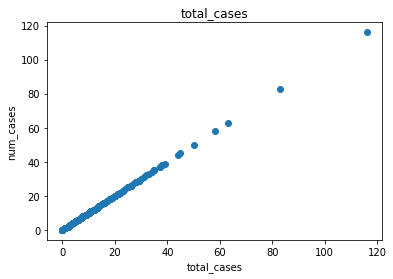

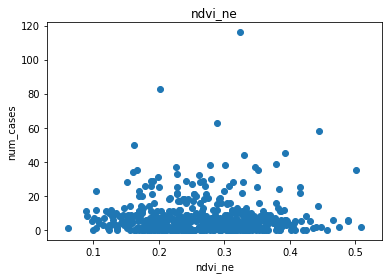

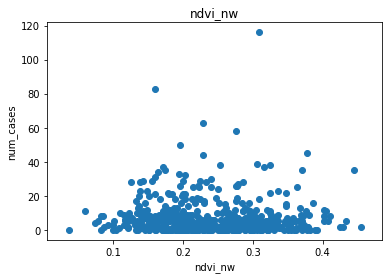

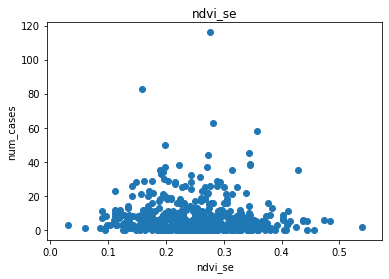

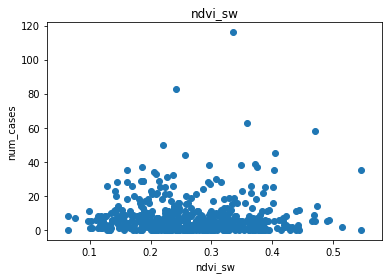

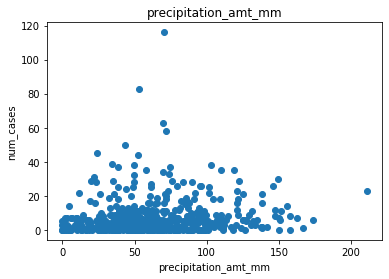

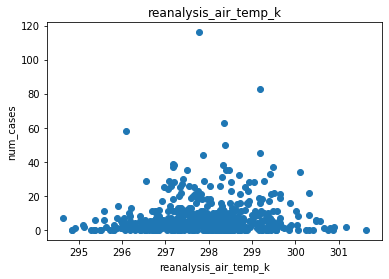

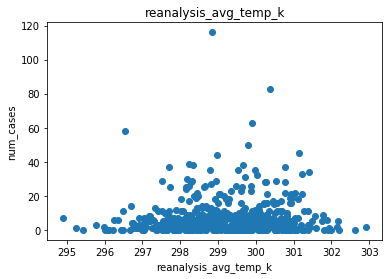

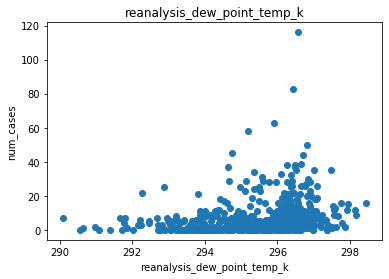

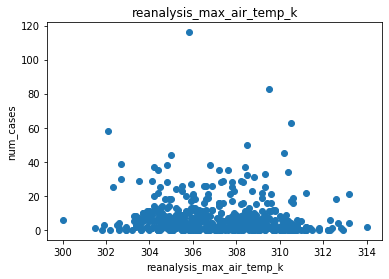

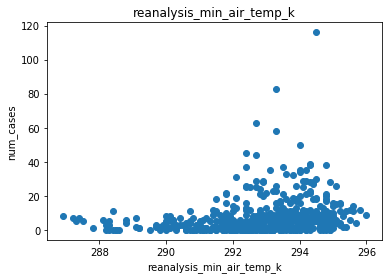

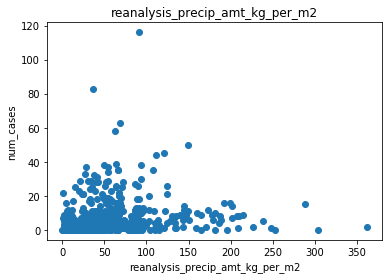

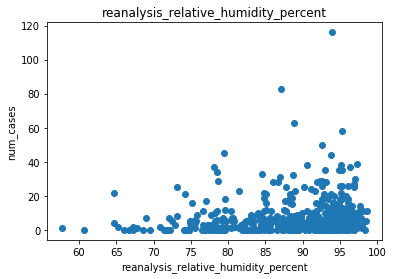

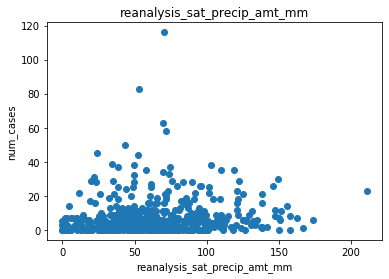

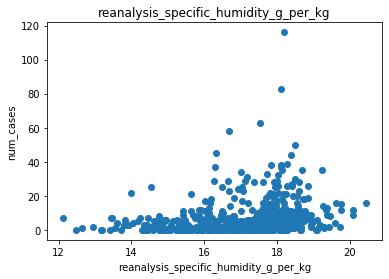

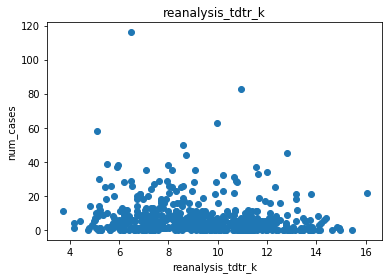

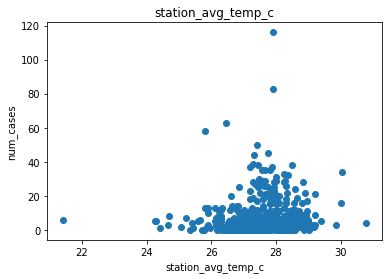

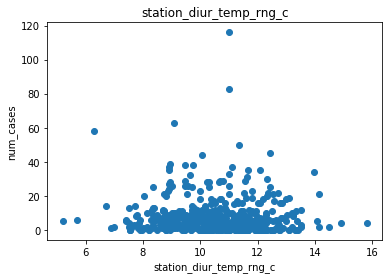

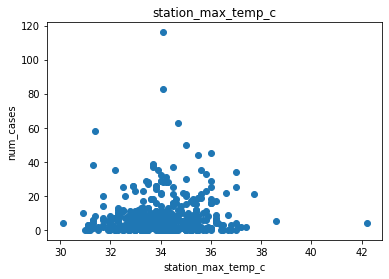

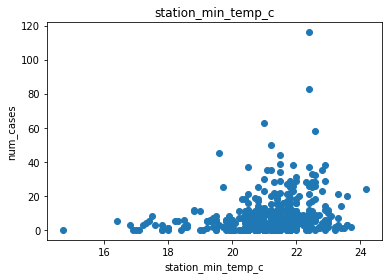

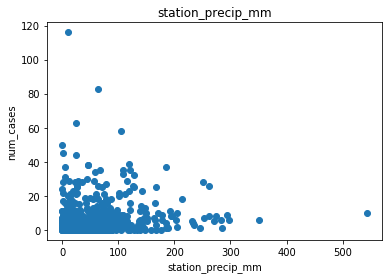

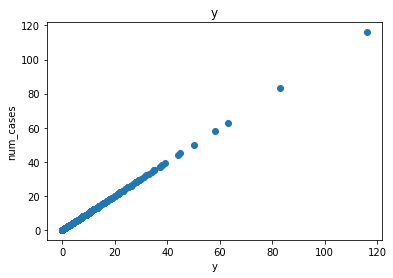

In [48]:
for col in iq.columns:
    if iq[col].dtype in ['float64','int64']:
        plt.scatter(iq[col],iq['y'])
        plt.title('{}'.format(col))
        plt.xlabel('{}'.format(col))
        plt.ylabel('num_cases')
        plt.show()

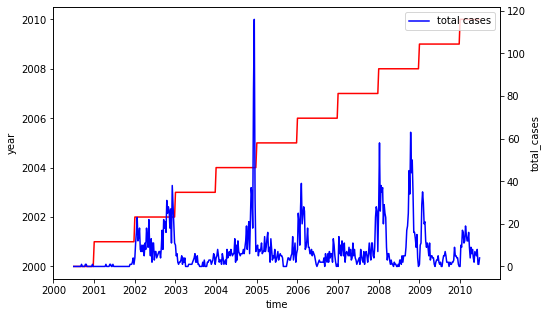

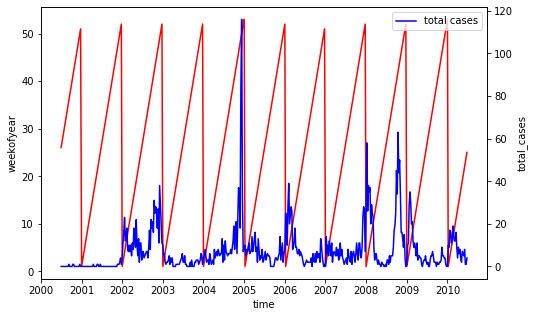

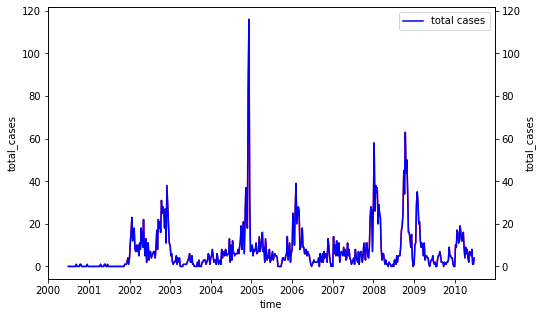

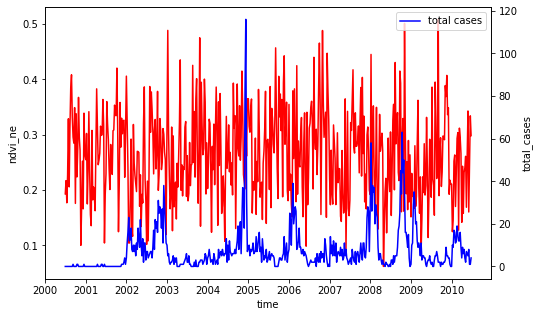

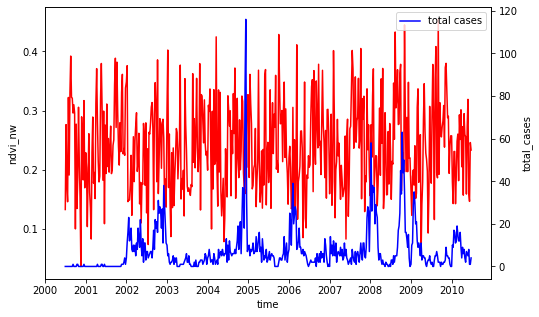

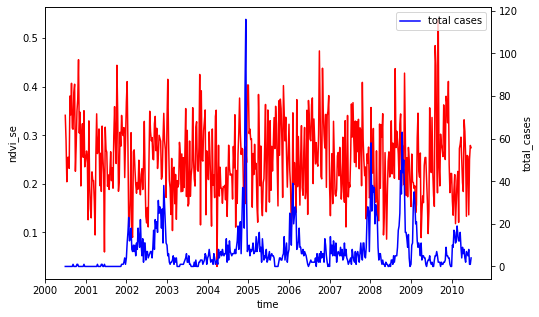

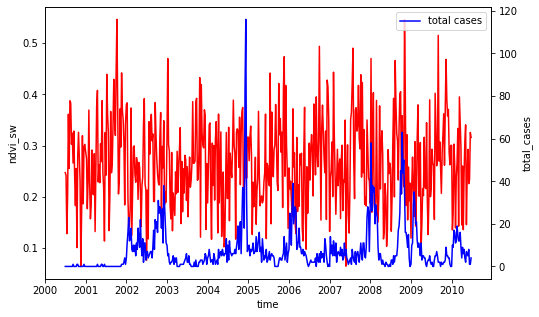

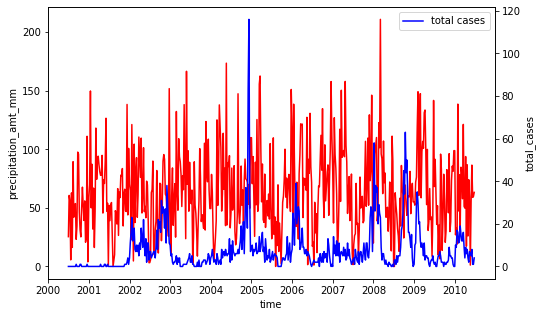

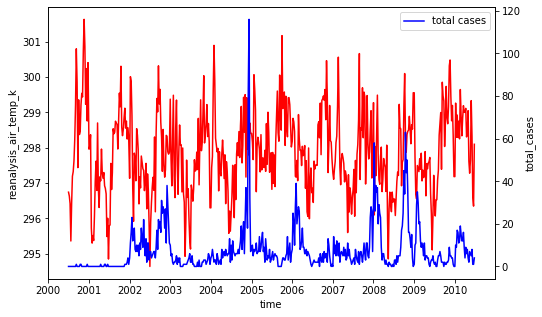

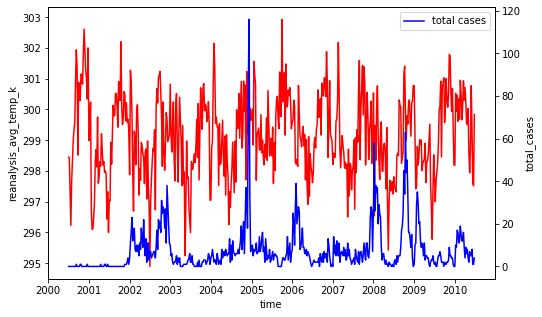

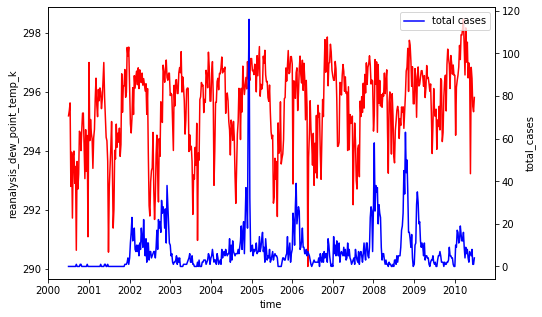

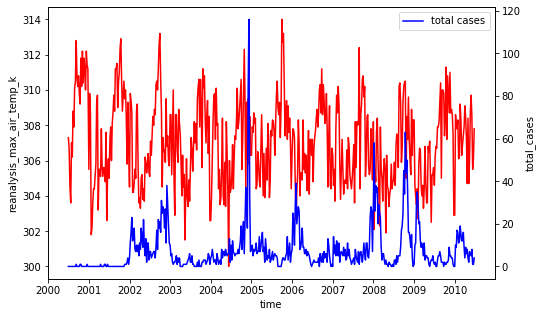

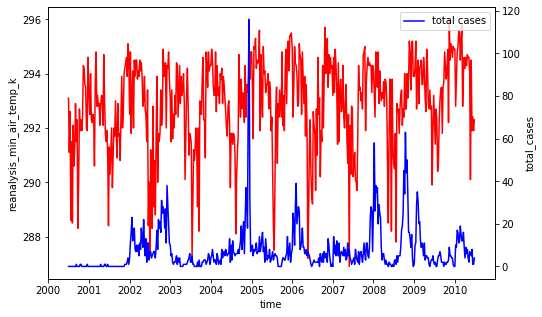

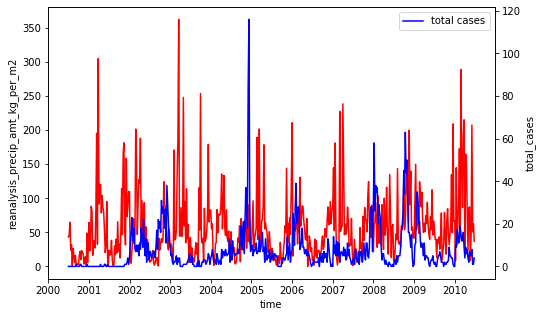

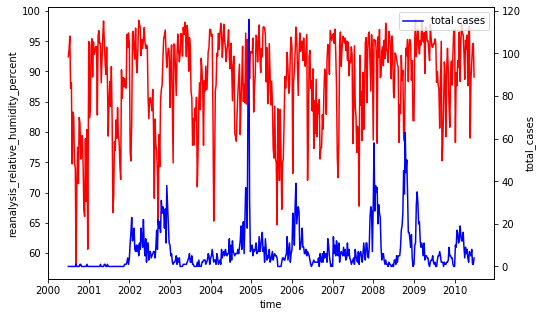

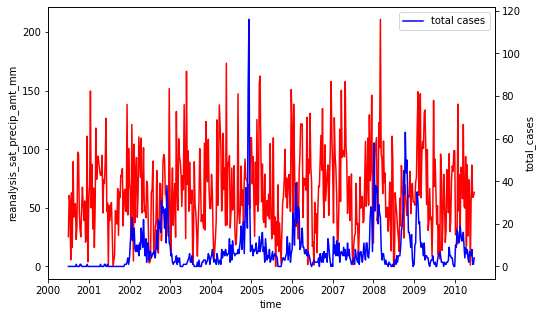

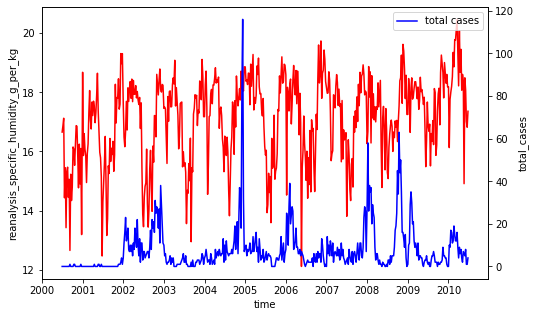

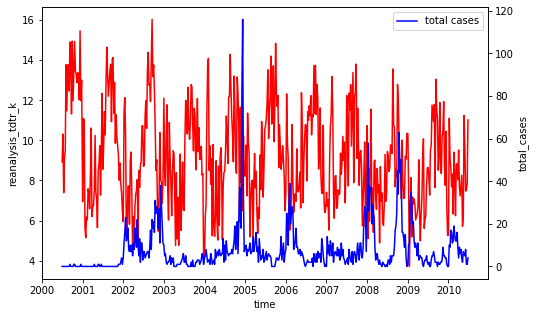

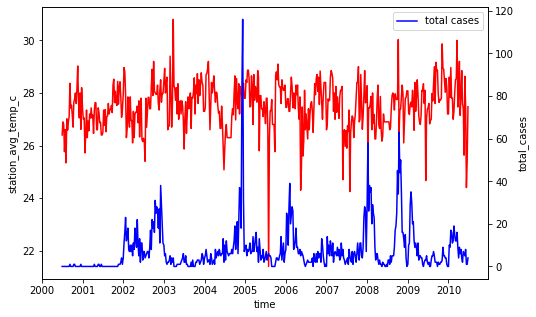

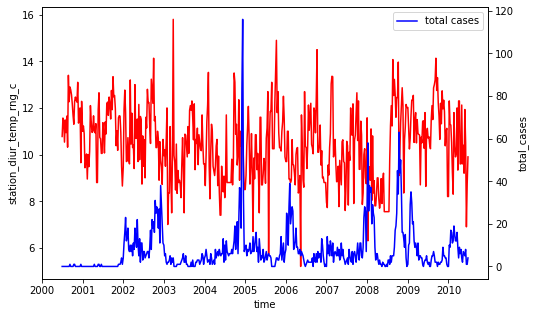

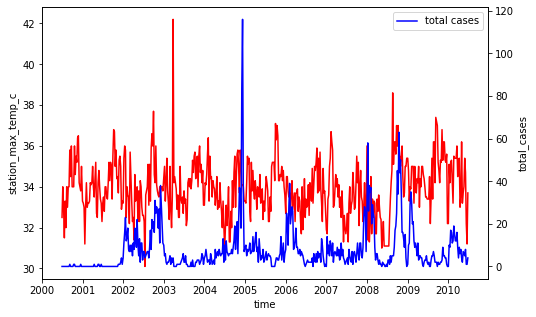

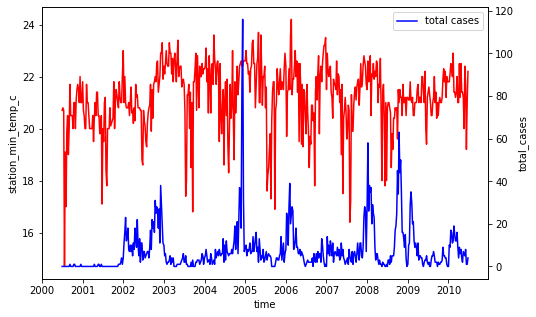

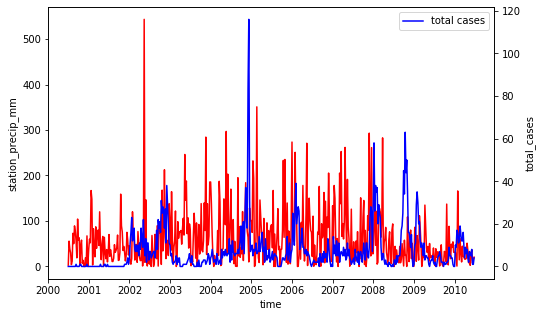

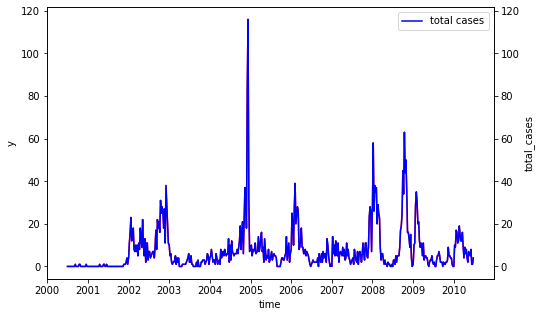

In [49]:
iq_plot = pd.DataFrame(iq.loc[iq.week_start_date.dt.year > 1990,:])
for col in iq.columns:
    if iq[col].dtype in ['float64','int64']:
        f, ax1 = plt.subplots(figsize=(8,5))
        ax1.plot(iq_plot['week_start_date'],iq_plot[col],label='{}'.format(col),c='r')
        ax1.set_xlabel('time')
        ax1.set_ylabel('{}'.format(col))
        ax2 = ax1.twinx()
        ax2.plot(iq_plot['week_start_date'],iq_plot['y'],label='total cases',c='b')
        ax2.set_ylabel('total_cases')
        plt.legend()
#         plt.xlim(pd.to_datetime('2000-01-01'), pd.to_datetime('2008-05-01'))
        plt.show()

In [58]:
iq.columns


Index(['city', 'year', 'weekofyear', 'total_cases', 'week_start_date',
       'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm',
       'reanalysis_air_temp_k', 'reanalysis_avg_temp_k',
       'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k',
       'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'y'],
      dtype='object')

In [66]:
# Can change between minmax and standard with following line, for testing 
scale = StandardScaler()
#add some more columns in to training data, tried not to overlap in category too much
iq_train = pd.DataFrame(iq.loc[iq.week_start_date.dt.year > 2005,['week_start_date','y','station_precip_mm','ndvi_nw',
                                 'ndvi_sw','reanalysis_relative_humidity_percent','station_diur_temp_rng_c',
                                              'reanalysis_avg_temp_k','station_min_temp_c','station_max_temp_c','reanalysis_min_air_temp_k',
                                                                 'reanalysis_precip_amt_kg_per_m2']])
iq_train.rename(columns={'week_start_date':'ds'}, inplace=True)
# sj_train['cap'] = np.max(sj_train['y'])


iq_train_train = pd.DataFrame(iq_train.loc[iq_train.ds < pd.to_datetime('2009-06-01'),:])
scale.fit(iq_train_train.y.values.reshape(-1,1))
iq_train_test = pd.DataFrame(iq_train.loc[iq_train.ds >= pd.to_datetime('2009-06-01'),:])
iq_train_train.y = scale.transform(iq_train_train.y.values.reshape(-1,1))
iq_train_test.y = scale.transform(iq_train_test.y.values.reshape(-1,1))
#commented out cap lines are for growth='logistic'
# sj_train_test.cap = scale.transform(sj_train_test.cap.values.reshape(-1,1))
# sj_train_train.cap = scale.transform(sj_train_train.cap.values.reshape(-1,1))
iq_train_train.tail()



ds         y  station_precip_mm   ndvi_nw   ndvi_sw  \
1395 2009-04-30 -0.542485               30.8  0.345514  0.316129   
1396 2009-05-07 -0.542485               44.0  0.264557  0.219200   
1397 2009-05-14 -0.799299               11.2  0.227857  0.216043   
1398 2009-05-21 -0.884904               50.5  0.217200  0.344514   
1399 2009-05-28 -0.713694               19.3  0.197317  0.190143   

      reanalysis_relative_humidity_percent  station_diur_temp_rng_c  \
1395                             95.078571                10.750000   
1396                             95.100000                10.500000   
1397                             93.298571                11.425000   
1398                             91.790000                11.450000   
1399                             97.742857                10.266667   

      reanalysis_avg_temp_k  station_min_temp_c  station_max_temp_c  \
1395             298.321429                21.0                34.0   
1396             298.542857                22.0                35.0   
1397             299.007143                22.0                35.0   
1398             299.521429                21.4                34.6   
1399             297.521429                21.0                34.4   

      reanalysis_min_air_temp_k  reanalysis_precip_amt_kg_per_m2  
1395                      294.3                            93.80  
1396                      292.9                            59.50  
1397                      292.7                            46.43  
1398                      293.4                            39.89  
1399                      292.7                            73.00

In [71]:
#add in regressors and tune parameters.  Fourier and prior scale have to do with how flexible the model is to changes
#higher number is model responds more strongly to that input, changepoint is on a smaller scale than seasonality and regressors
model = Prophet(changepoint_range=.65, growth='linear',yearly_seasonality=10, changepoint_prior_scale=.8,
               seasonality_prior_scale=15)
# model.add_seasonality(period=365*2,name='bi-anual',fourier_order=8, prior_scale=15)
model.add_regressor('station_precip_mm', mode='additive',prior_scale=8)
model.add_regressor('ndvi_nw',standardize=True, mode='additive',prior_scale=2)
# model.add_regressor('ndvi_nw',standardize=True, mode='additive',prior_scale=10)
model.add_regressor('ndvi_sw',standardize=True, mode='additive',prior_scale=2)
# model.add_regressor('ndvi_se',standardize=True, mode='additive')
model.add_regressor('reanalysis_relative_humidity_percent',standardize=True, mode='additive',prior_scale=8)
model.add_regressor('station_diur_temp_rng_c',standardize=True, mode='additive',prior_scale=8)
model.add_regressor('reanalysis_avg_temp_k',standardize=True, mode='additive',prior_scale=8)
model.add_regressor('station_min_temp_c',standardize=True, mode='additive',prior_scale=20)
model.add_regressor('station_max_temp_c',standardize=True, mode='additive',prior_scale=8)
model.add_regressor('reanalysis_min_air_temp_k',standardize=True, mode='additive',prior_scale=8)
model.add_regressor('reanalysis_precip_amt_kg_per_m2',standardize=True, mode='additive',prior_scale=8)



model.fit(iq_train_train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [72]:
future = model.make_future_dataframe(periods=52*1,freq='1W')
#furture dataframe needs the extra regressor columns, so in real world need to be able to also predict all of the 
#feature variables
#merge with existing one to get last year of data 
#fbprophet uses built in scaling again
iq_merge = pd.DataFrame(iq_train.loc[:,['ds','station_precip_mm','cap','ndvi_nw',
                                 'ndvi_sw','reanalysis_relative_humidity_percent','station_diur_temp_rng_c',
                                              'reanalysis_avg_temp_k','station_min_temp_c','station_max_temp_c','reanalysis_min_air_temp_k',
                                       'reanalysis_precip_amt_kg_per_m2']])

future_n = pd.merge(iq_merge.set_index(pd.DatetimeIndex(iq_merge['ds'])), 
                    future.set_index(pd.DatetimeIndex(future['ds'])), 
                    how='left', left_index=True, right_index=True)
future_n = future_n.reset_index()
future_n.drop(columns=['ds_x','ds_y'], inplace=True)
# future_n.cap = scale.transform(future_n.cap.values.reshape(-1,1))
future_n.head()

C:\Users\graha\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike



ds  station_precip_mm  cap   ndvi_nw   ndvi_sw  \
0 2006-01-01              273.5  NaN  0.219950  0.256333   
1 2006-01-08               70.1  NaN  0.239343  0.215500   
2 2006-01-15               60.1  NaN  0.202071  0.230350   
3 2006-01-22               54.8  NaN  0.133643  0.194429   
4 2006-01-29              250.9  NaN  0.137700  0.160783   

   reanalysis_relative_humidity_percent  station_diur_temp_rng_c  \
0                             93.821429                     9.70   
1                             73.161429                     9.70   
2                             88.335714                    11.00   
3                             89.955714                    11.00   
4                             93.114286                     8.95   

   reanalysis_avg_temp_k  station_min_temp_c  station_max_temp_c  \
0             299.578571                22.4                32.7   
1             299.642857                19.7                34.5   
2             300.300000                21.4                34.5   
3             300.114286                21.5                33.8   
4             298.292857                22.3                33.5   

   reanalysis_min_air_temp_k  reanalysis_precip_amt_kg_per_m2  
0                      294.9                            210.5  
1                      292.4                             15.2  
2                      293.5                             47.6  
3                      295.0                             52.2  
4                      294.4                             52.2

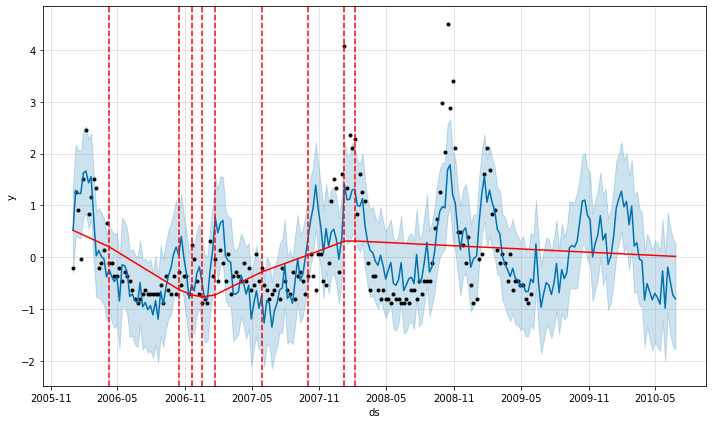

In [73]:
forcast = model.predict(future_n)
fig = model.plot(forcast)
a = add_changepoints_to_plot(fig.gca(), model, forcast)

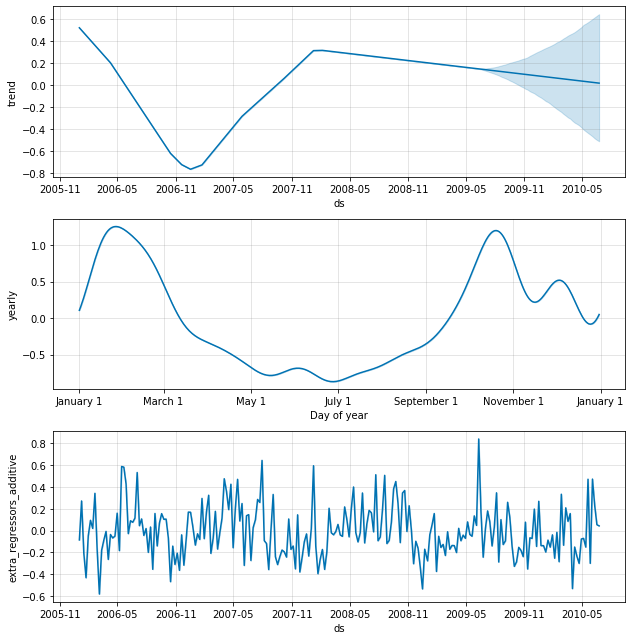

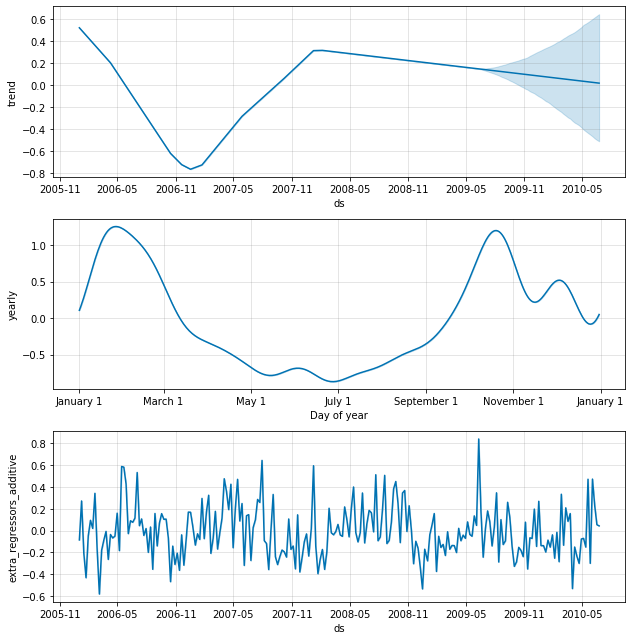

In [74]:
model.plot_components(forcast)

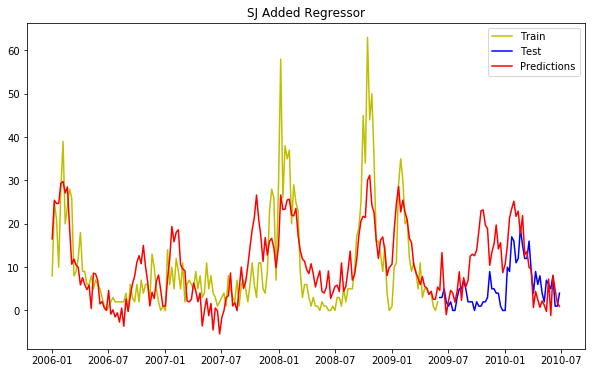

In [75]:
#vis results
plt.figure(figsize=(10,6))
plt.plot(iq_train_train['ds'], 
            scale.inverse_transform(iq_train_train['y'].values.reshape(-1,1)), c='y',label="Train")
plt.plot(iq_train_test['ds'],
            scale.inverse_transform(iq_train_test['y'].values.reshape(-1,1)),c='b',label="Test")
plt.plot(forcast['ds'],
            scale.inverse_transform(forcast['yhat'].values.reshape(-1,1)),c='r',label="Predictions")

plt.legend()
plt.title('SJ Added Regressor')
plt.show()

Train R2 0.5593685667412482
Test R2 -2.345394436149369
Train MAE 5.686296760166657
Test MAE 6.701637404172983


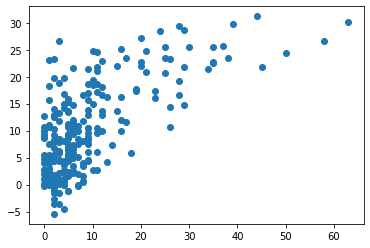

In [76]:
plt.scatter(iq_train['y'],scale.inverse_transform(forcast['yhat'].values.reshape(-1,1)))
print('Train R2',r2_score(scale.inverse_transform(iq_train_train['y'].values.reshape(-1,1)),scale.inverse_transform(forcast.loc[forcast.ds < pd.to_datetime('2009-06-01'), 'yhat'].values.reshape(-1,1)).reshape(len(iq_train_train),)))
print('Test R2',r2_score(scale.inverse_transform(iq_train_test['y'].values.reshape(-1,1)),scale.inverse_transform(forcast.loc[forcast.ds >= pd.to_datetime('2009-06-01'), 'yhat'].values.reshape(-1,1)).reshape(len(iq_train_test),)))
print('Train MAE',mean_absolute_error(scale.inverse_transform(iq_train_train['y'].values.reshape(-1,1)),scale.inverse_transform(forcast.loc[forcast.ds < pd.to_datetime('2009-06-01'), 'yhat'].values.reshape(-1,1)).reshape(len(iq_train_train),)))
print('Test MAE',mean_absolute_error(scale.inverse_transform(iq_train_test['y'].values.reshape(-1,1)),scale.inverse_transform(forcast.loc[forcast.ds >= pd.to_datetime('2009-06-01'), 'yhat'].values.reshape(-1,1)).reshape(len(iq_train_test),)))

In [78]:
train = pd.DataFrame(iq_train_train.loc[:,['ds','y']])
test = pd.DataFrame(iq_train_test.loc[:,['ds','y']])
train.y = scale.inverse_transform(train.y)
test.y = scale.inverse_transform(test.y)
predictions = pd.DataFrame(forcast.loc[:,['ds','yhat']])
predictions.yhat = scale.inverse_transform(predictions.yhat)
predictions.yhat = predictions.yhat.apply(fill_0)
train.y = train.y.astype(int)
test.y = test.y.astype(int)
train.to_csv('iq_train.csv',date_format='%Y-%m-%d',index=False)
test.to_csv('iq_test.csv',date_format='%Y-%m-%d',index=False)
predictions.to_csv('iq_predictions.csv',date_format='%Y-%m-%d',index=False)


In [58]:
df_cv = cross_validation(model, initial='365 days', period='180 days', horizon = '730 days')
df_cv.head()

INFO:fbprophet:Making 1 forecasts with cutoffs between 2007-05-29 00:00:00 and 2007-05-29 00:00:00


ds      yhat  yhat_lower  yhat_upper         y     cutoff
0 2007-06-04 -0.435969   -0.785777   -0.020581 -0.542485 2007-05-29
1 2007-06-11 -0.364079   -0.761217    0.002064 -0.628089 2007-05-29
2 2007-06-18 -0.271171   -0.645081    0.121244 -0.799299 2007-05-29
3 2007-06-25 -0.313732   -0.682751    0.055351 -0.713694 2007-05-29
4 2007-07-02 -0.382837   -0.765034   -0.063813 -0.628089 2007-05-29

horizon       mse      rmse       mae      mape  coverage
0 69 days  0.341781  0.584621  0.483278  0.867561       0.5
1 76 days  0.397647  0.630593  0.548126  0.953712       0.4
2 83 days  0.414959  0.644173  0.571001  1.084171       0.3
3 90 days  0.482180  0.694392  0.615714  1.140112       0.3
4 97 days  0.645105  0.803184  0.709479  1.444347       0.3

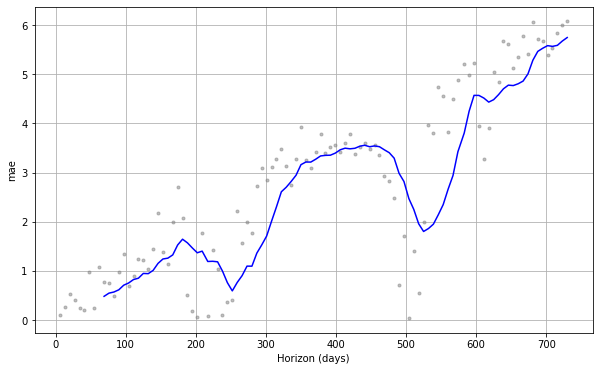

In [59]:
df_p = performance_metrics(df_cv)
display(df_p.head())

fig = plot_cross_validation_metric(df_cv, metric='mae')

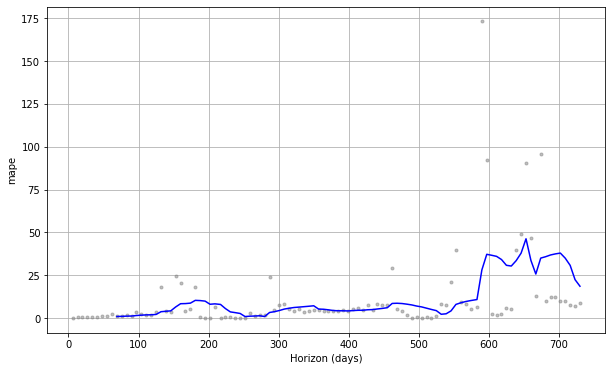

In [60]:
fig = plot_cross_validation_metric(df_cv, metric='mape')

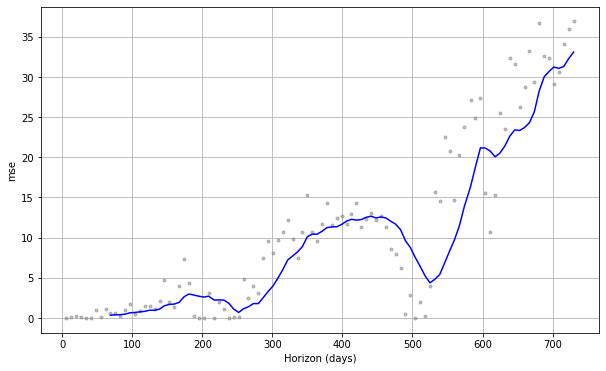

In [61]:
fig = plot_cross_validation_metric(df_cv, metric='mse')

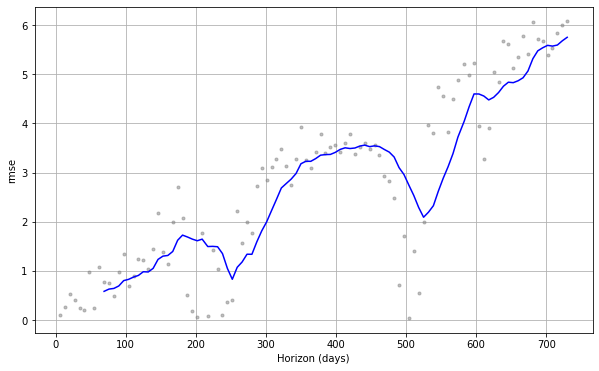

In [62]:
fig = plot_cross_validation_metric(df_cv, metric='rmse')

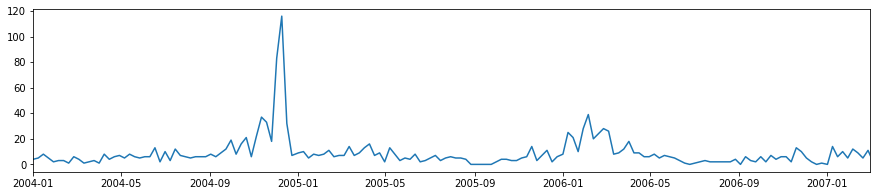

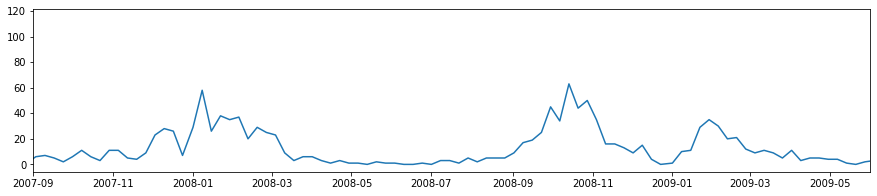

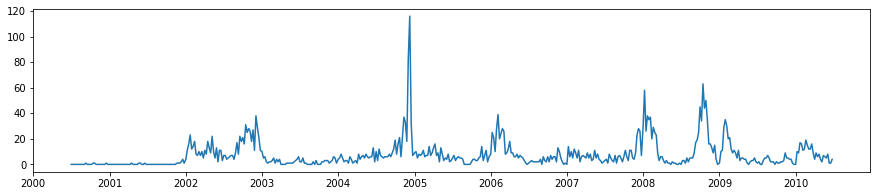

In [63]:
plt.figure(figsize=(15,3))
plt.plot(iq['week_start_date'],iq['y'])
plt.xlim(pd.to_datetime('2004-01-01'), pd.to_datetime('2007-03-01'))
plt.show()
plt.figure(figsize=(15,3))
plt.plot(iq['week_start_date'],iq['y'])
plt.xlim(pd.to_datetime('2007-09-01'), pd.to_datetime('2009-06-01'))
plt.show()
plt.figure(figsize=(15,3))
plt.plot(iq['week_start_date'],iq['y'])
plt.show()